<a href="https://colab.research.google.com/github/Pestrdan/netology_research/blob/main/Machine_learning/FEML_28_HW4_%D0%9F%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Получите и загрузите данные.**

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('train.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.**

In [ ]:
#убираем категориальные переменные
df = df[['Survived', 'Age', 'SibSp', 'Parch', 'Fare']]
df.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [ ]:
#Очищаем от пропусков
df = df[~(df['Age'].isna())]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Age       714 non-null    float64
 2   SibSp     714 non-null    int64  
 3   Parch     714 non-null    int64  
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


In [ ]:
X = df.copy()
del X['Survived']

In [ ]:
y = df['Survived']

In [ ]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [ ]:
X

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500
...,...,...,...,...
885,39.0,0,5,29.1250
886,27.0,0,0,13.0000
887,19.0,0,0,30.0000
889,26.0,0,0,30.0000


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.702276707530648

In [ ]:
model.score(X_test, y_test)

0.6923076923076923

# **3. Снова загрузите полные данные.**


In [ ]:
df_1 = pd.read_csv('train.csv')

# **4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.**

In [ ]:
#Предлагается удалить:
#Предлагается удалить:
#Имя и номер билета - большое кол-во уникальных значений вероятно не позволит проанализировать корреляцию в рамках Colab
#Cabin - слишком большое кол-во пропусков - большое кол-во уникальных значений вероятно не позволит проанализировать корреляцию в рамках Colab
#Cabin - слишком большое кол-во пропусков
df_2 = df_1.drop(['Name', 'Ticket', 'Cabin'], axis=1)
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


# **5. Проверьте данные на наличие пропущенных значений.**

**a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.**

In [ ]:
df_2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [ ]:
#процент пропущенных строк
df_2['Age'].isna().sum() / df_2.shape[0]

0.19865319865319866

**b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.**

In [ ]:
#заполнение строк

In [ ]:
df_2['Age'] = df_2['Age'].fillna(df_2['Age'].mean())

In [ ]:
#df_2['Age'] = df_2.groupby('Sex')['Age'].transform('median')

In [ ]:
df_2['Embarked'] = df_2['Embarked'].fillna(df_2['Embarked'].mode()[0])

In [ ]:
df_2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# **5. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df_2['Sex'])

LabelEncoder()

In [ ]:
df_2['Sex'] = pd.Series(data=le.transform(df_2['Sex']))

In [ ]:
df_2 = pd.get_dummies(df_2, columns=['Embarked'])
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


# **5. Проверьте данные на наличие выбросов.**

**a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.**


In [ ]:
df_2.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.725028
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.446751
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Ящик с усами по возрасту')

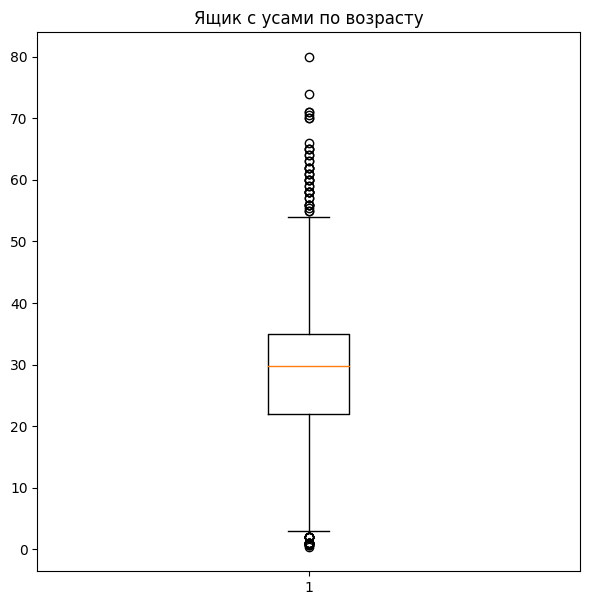

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df_2['Age'])
plt.title("Ящик с усами по возрасту")

Text(0.5, 1.0, 'Гистограмма по возрасту')

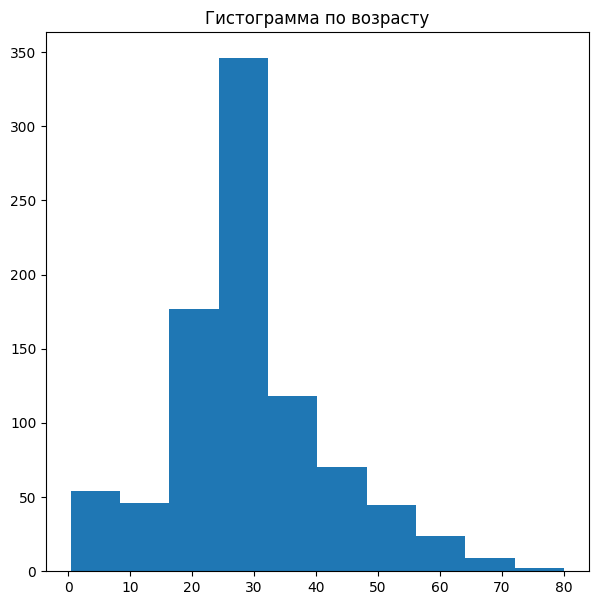

In [ ]:
plt.figure(figsize=(7, 7))
plt.hist(df_2['Age'])
plt.title("Гистограмма по возрасту")

In [ ]:
#Удалим строки с возрастом менее 1 года и более 70 лет, таких значений немного и они находятся за пределами статистик
df_2 = df_2[(df_2['Age'] > 1) & (df_2['Age'] < 70)]

Text(0.5, 1.0, 'Ящик с усами по кол-ву родственников-попутчиков')

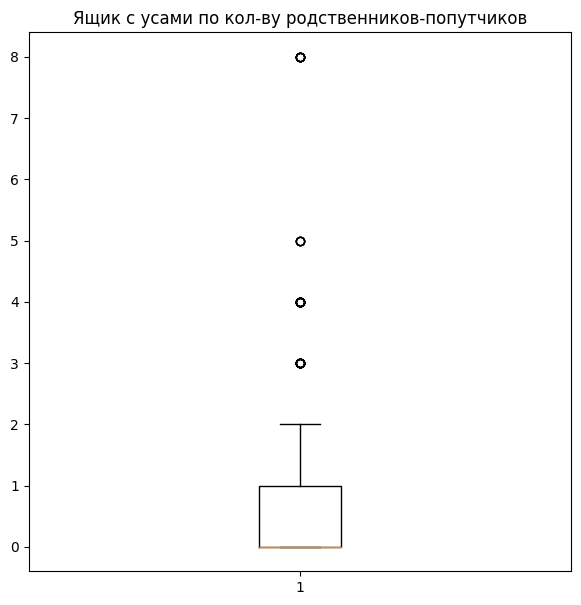

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df_2['SibSp'])
plt.title("Ящик с усами по кол-ву родственников-попутчиков")

Text(0.5, 1.0, 'Ящик с усами по кол-ву родителей или детей, с которыми путешествовал каждый пассажир')

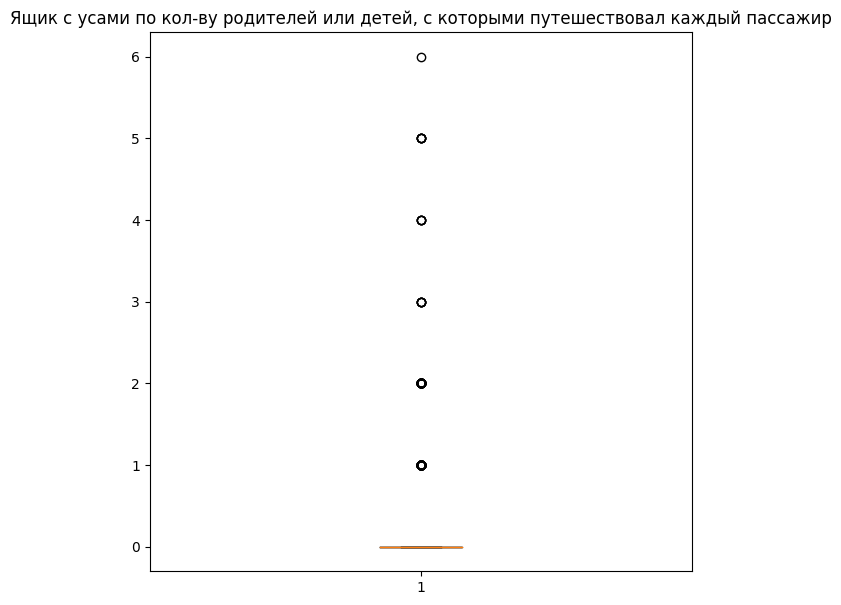

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df_2['Parch'])
plt.title("Ящик с усами по кол-ву родителей или детей, с которыми путешествовал каждый пассажир")

Text(0.5, 1.0, 'Ящик с усами по стоимости билета')

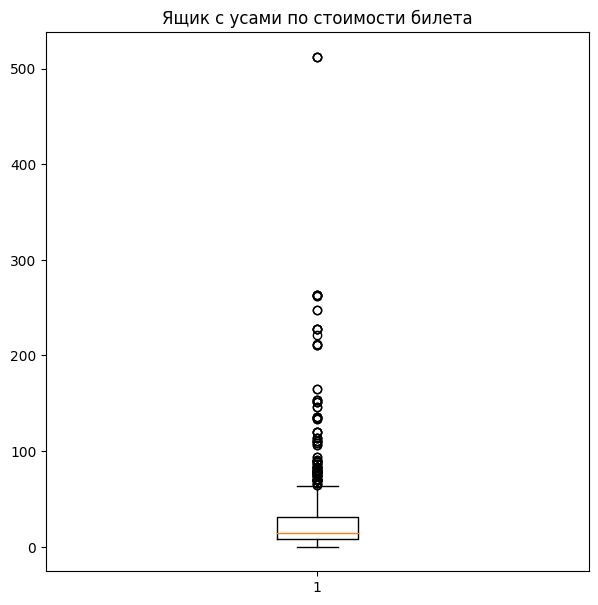

In [ ]:
plt.figure(figsize=(7, 7))
plt.boxplot(df_2['Fare'])
plt.title("Ящик с усами по стоимости билета")

Text(0.5, 1.0, 'Гистограмма по стоимости билета')

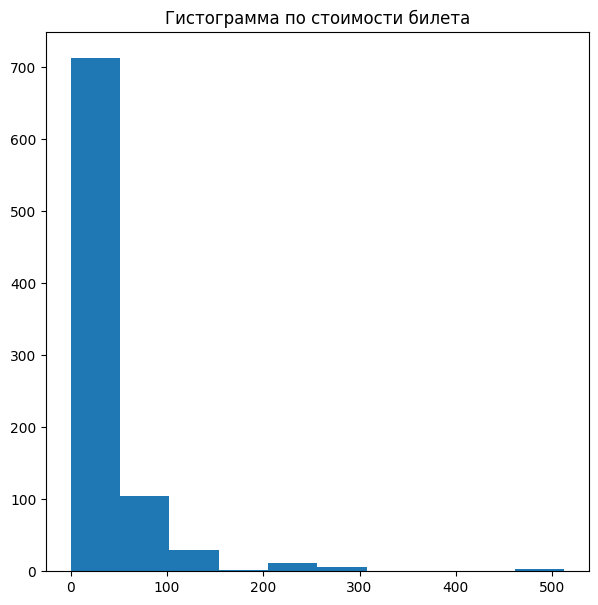

In [ ]:
plt.figure(figsize=(7, 7))
plt.hist(df_2['Fare'])
plt.title("Гистограмма по стоимости билета")

In [ ]:
#Удалим строки со стоимостью 0 и более 150, таких значений немного и они находятся за пределами статистик
df_2 = df_2[(df_2['Fare'] > 0) & (df_2['Fare'] < 150)]

# **8. *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)**



Постироил визуализацию в рамках работы с выбромами. Видно, что основная часть пассажиров приходится на возраст до 30 лет с дешевыми билетами

# **9. *Попробуйте математически преобразовать признак Age.**

In [ ]:
import numpy as np

In [ ]:
df_2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


In [ ]:
df_2['Age'] = np.log(df_2['Age'])

# **10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.**



In [ ]:
X = df_2.copy()
del X['Survived']
y = df_2['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_train, y_train)

0.8139183055975794

# **11. Сформулируйте выводы по проделанной работе.**



**a) Кратко опишите какие преобразования были сделаны и почему.**

Имя и номер билета удалены потому что присутствует большое кол-во уникальных значений, что вероятно не позволит проанализировать корреляцию в рамках Colab. Для анализа, возможно, можно было бы разбить поле "Name" на имя и фамилию, выделить первые буквы переменных, возможно при эвакуации использовались какие-то алфавитные списки. Аналогично и с номером билета

Поле Cabin удалено по причине слишком большого кол-ва пропусков



**b) Сравните метрики моделей из п. 2 и п. 10.**

Во второй раз метрика оказалось лучше, что в целом ожидаемо, так как модель получила больше данных

**c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. *Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?**

Да, это конечно целесообразно. Качество данных всегда не идеальное. Выбросы искажают статистики, а пропуски не позволяют проанализировать часть, возможно важных, данных